<a href="https://colab.research.google.com/github/SorensenThomas/DataAnalysis/blob/main/Billionaires_Analysis_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Billionaires Analysis 2021**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
#The dataset used is taken from Kaggle 
# https://www.kaggle.com/datasets/alexanderbader/forbes-billionaires-2021-30
data = pd.read_csv('data/forbes_billionaires_geo.csv') 
print(data.head())

                       Name  NetWorth        Country         Source  Rank  \
0                Jeff Bezos     177.0  United States         Amazon     1   
1                 Elon Musk     151.0  United States  Tesla, SpaceX     2   
2  Bernard Arnault & family     150.0         France           LVMH     3   
3                Bill Gates     124.0  United States      Microsoft     4   
4           Mark Zuckerberg      97.0  United States       Facebook     5   

    Age              Residence    Citizenship           Status  Children  \
0  57.0    Seattle, Washington  United States  In Relationship       4.0   
1  49.0          Austin, Texas  United States  In Relationship       7.0   
2  72.0          Paris, France         France          Married       5.0   
3  65.0     Medina, Washington  United States         Divorced       3.0   
4  36.0  Palo Alto, California  United States          Married       2.0   

                                           Education Self_made  \
0     Bachelor

Before continue with the analysis, we will check if the dataset content missing values and where.

<AxesSubplot:>

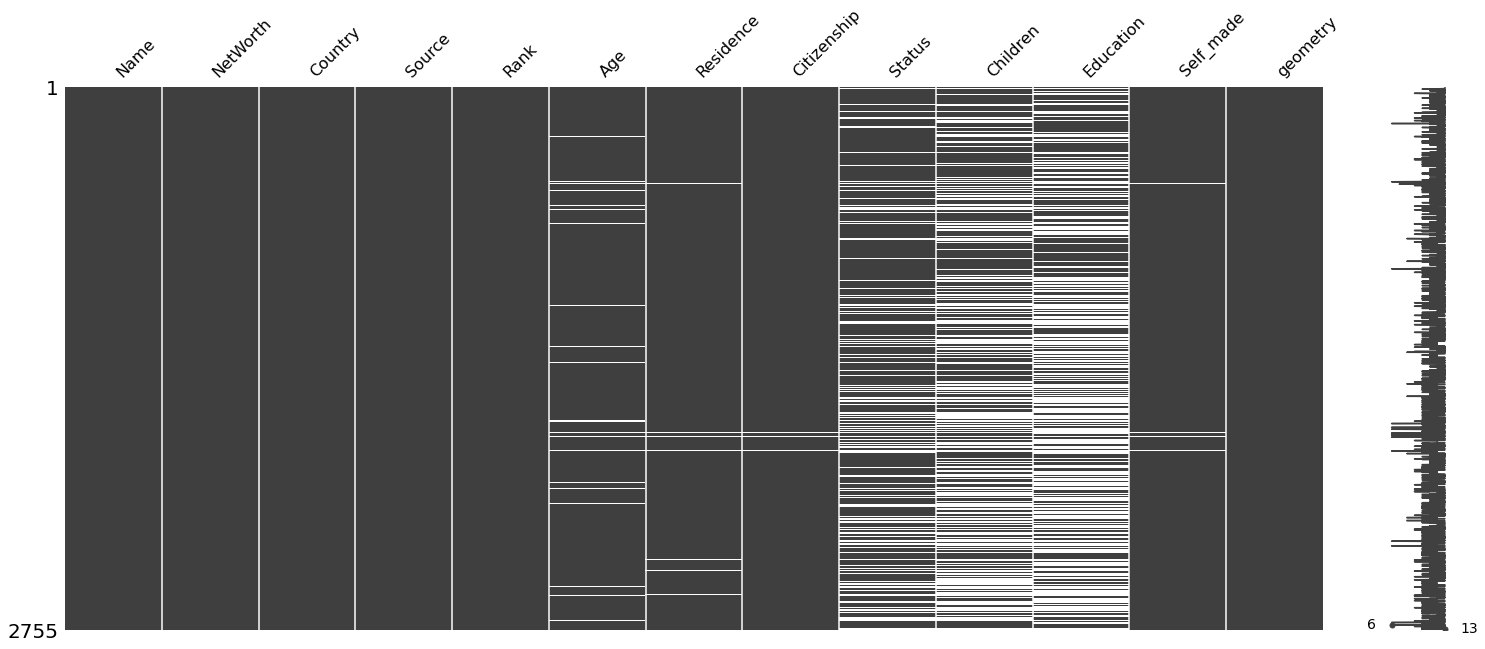

In [3]:
msno.matrix(data)

<AxesSubplot:>

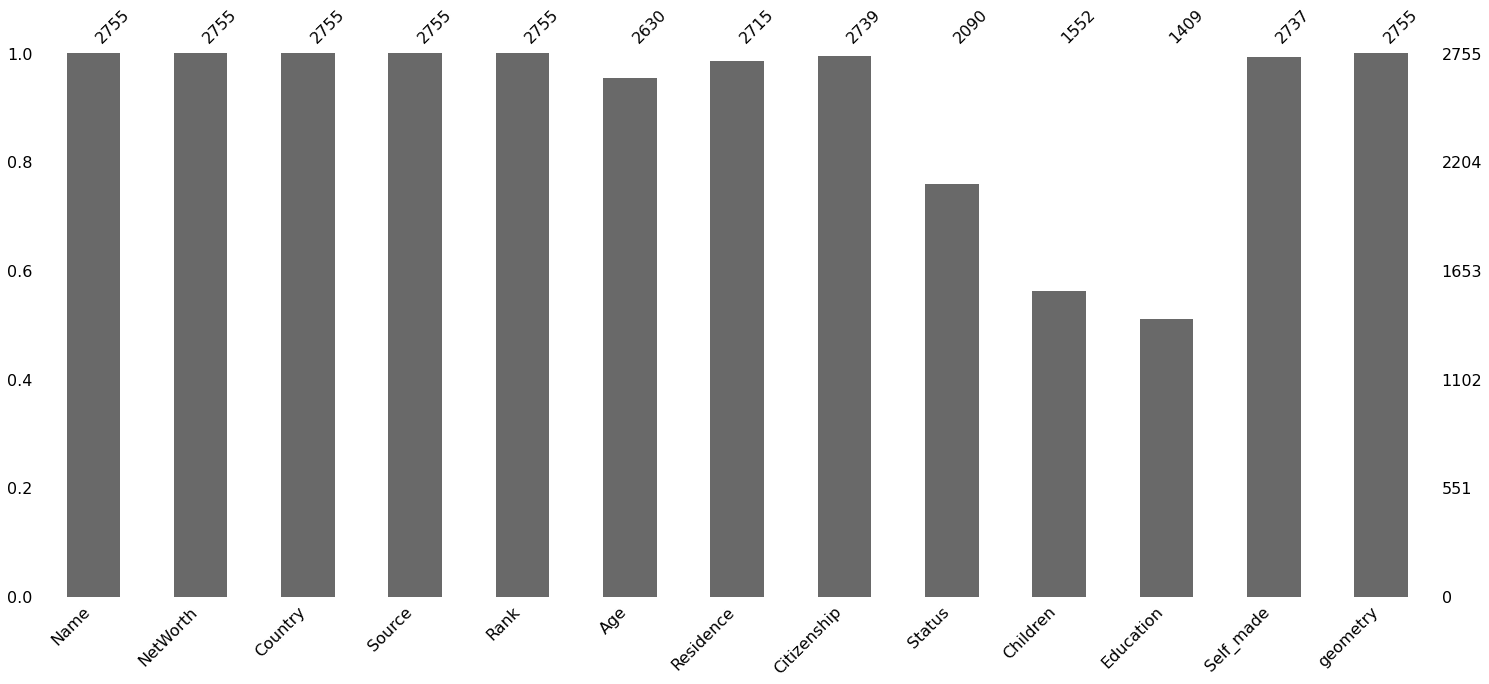

In [4]:
msno.bar(data)

<AxesSubplot:>

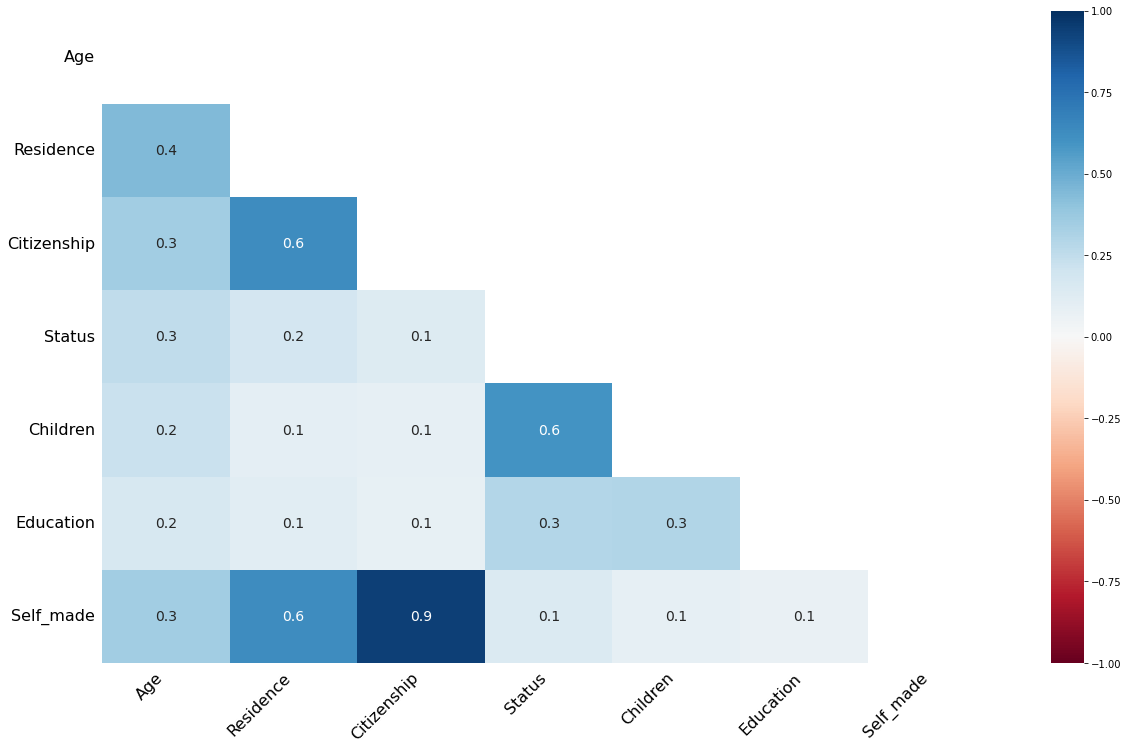

In [5]:
msno.heatmap(data)

The null correlation ranges from -1(if one variable appears, the other definitely does not) to 0(variables that appear or do not appear have no effect on each other) to 1(if one variable appears, the other definitely does as well).
It is possible to see that the most data missing are under 3 columns : Status, Children and Education

<AxesSubplot:>

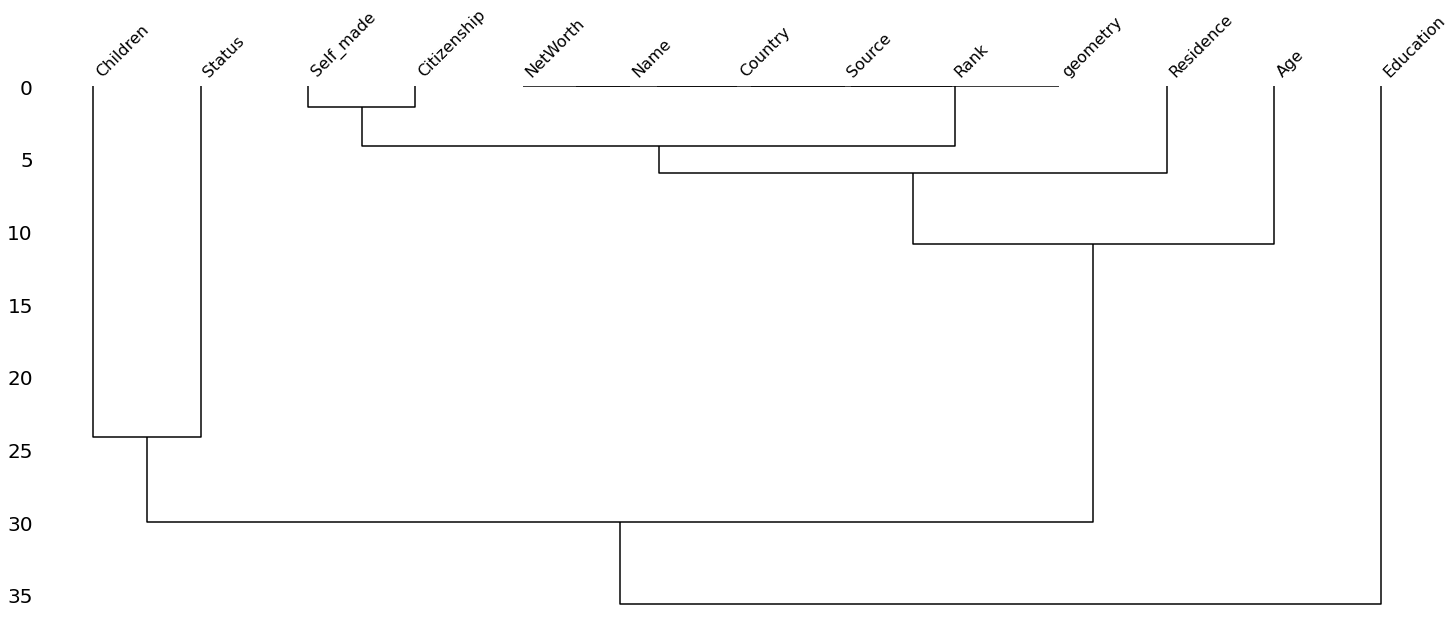

In [6]:
msno.dendrogram(data)

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

In [7]:
print(data.isnull().sum())

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
geometry          0
dtype: int64


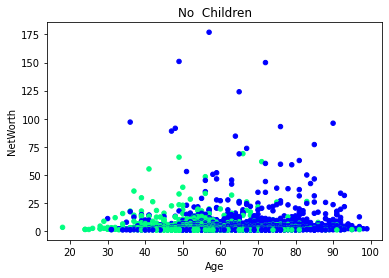

In [9]:
#Scatter plot
fig = plt.Figure()
null_values = data['Children'].isnull()
fig = data.plot(x='Age', y='NetWorth', kind='scatter', c=null_values,  cmap='winter',title='No  Children', colorbar=False)
plt.show()
#Correlacion between amount of money/age and no children.

In [10]:
data_copy = data.dropna(axis=0)
print(data_copy.isnull().sum())

Name           0
NetWorth       0
Country        0
Source         0
Rank           0
Age            0
Residence      0
Citizenship    0
Status         0
Children       0
Education      0
Self_made      0
geometry       0
dtype: int64


Take the top 10 of the list based on the NetWorth

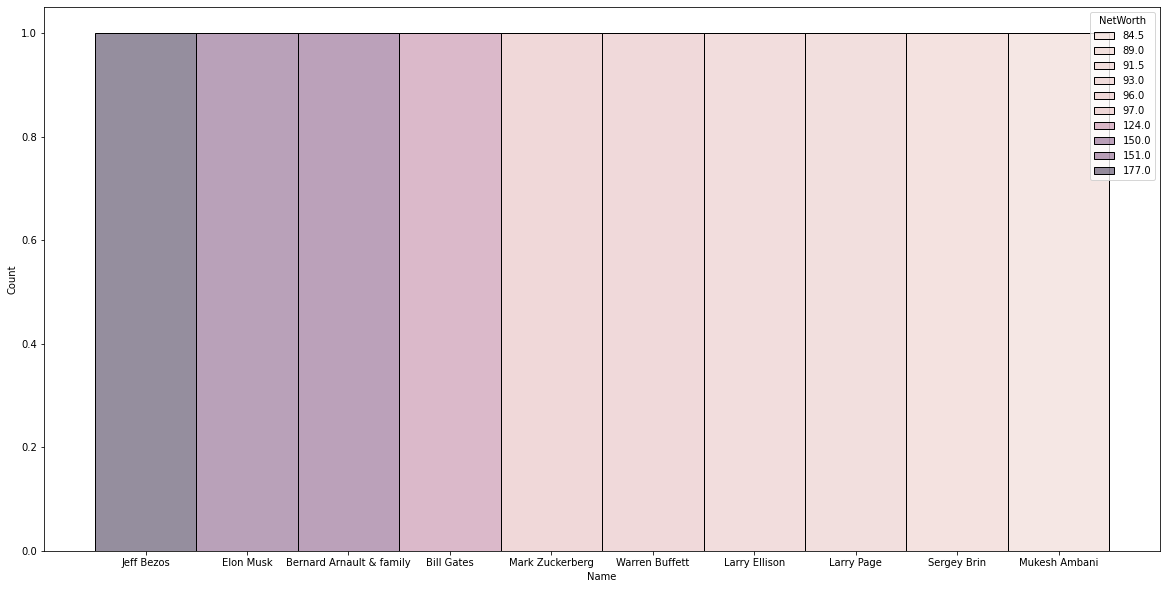

In [11]:
df = data_copy.sort_values(by= ['NetWorth'], ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x='Name', hue='NetWorth', data= df)
plt.show()


Now we are going to check the companies where are working the top 5

<function matplotlib.pyplot.show(close=None, block=None)>

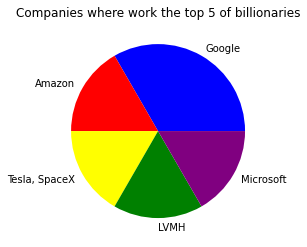

In [12]:
source = df['Source'].value_counts().head()
index = source.index
sources = source.values
colors = ['blue','red','yellow','green','purple']
plt.figure()
plt.pie(source, labels=index, colors= colors)
plt.title('Companies where work the top 5 of billionaries')
plt.show


We are going to do the same but with countries, to know the top 5 of countries with more billionaires

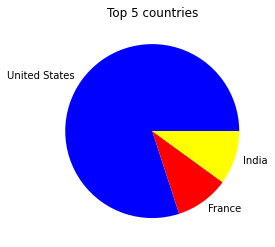

In [13]:
countries = df['Country'].value_counts().head()
index = countries.index
sources = countries.values
colors = ['blue','red','yellow','green','purple']
plt.figure()
plt.pie(countries, labels=index, colors = colors)
plt.title('Top 5 countries')
plt.show()

In [16]:
data['Country'].value_counts()

United States           724
China                   626
India                   140
Germany                 136
Russia                  118
                       ... 
Venezuela                 1
Eswatini (Swaziland)      1
Algeria                   1
Liechtenstein             1
Nepal                     1
Name: Country, Length: 70, dtype: int64

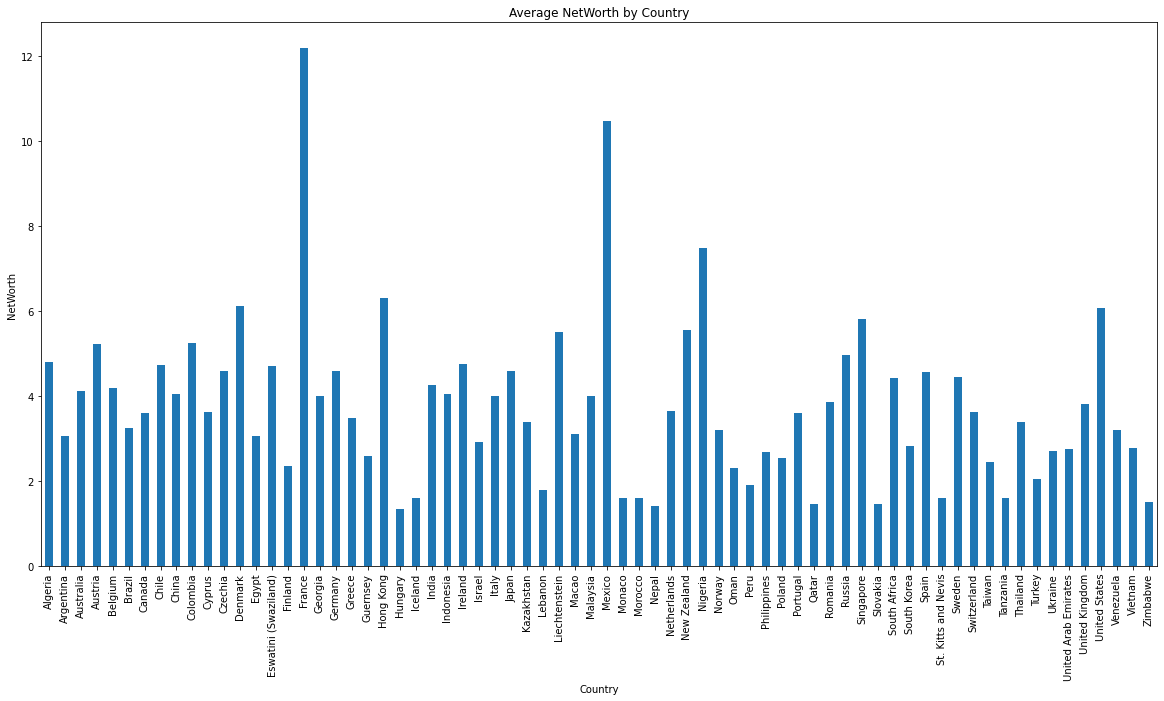

In [17]:
plt.figure(figsize=(20,10))
country_data = data.groupby('Country')['NetWorth'].mean()
country_data.plot.bar()
plt.title('Average NetWorth by Country')
plt.xlabel('Country')
plt.ylabel('NetWorth')
plt.show()

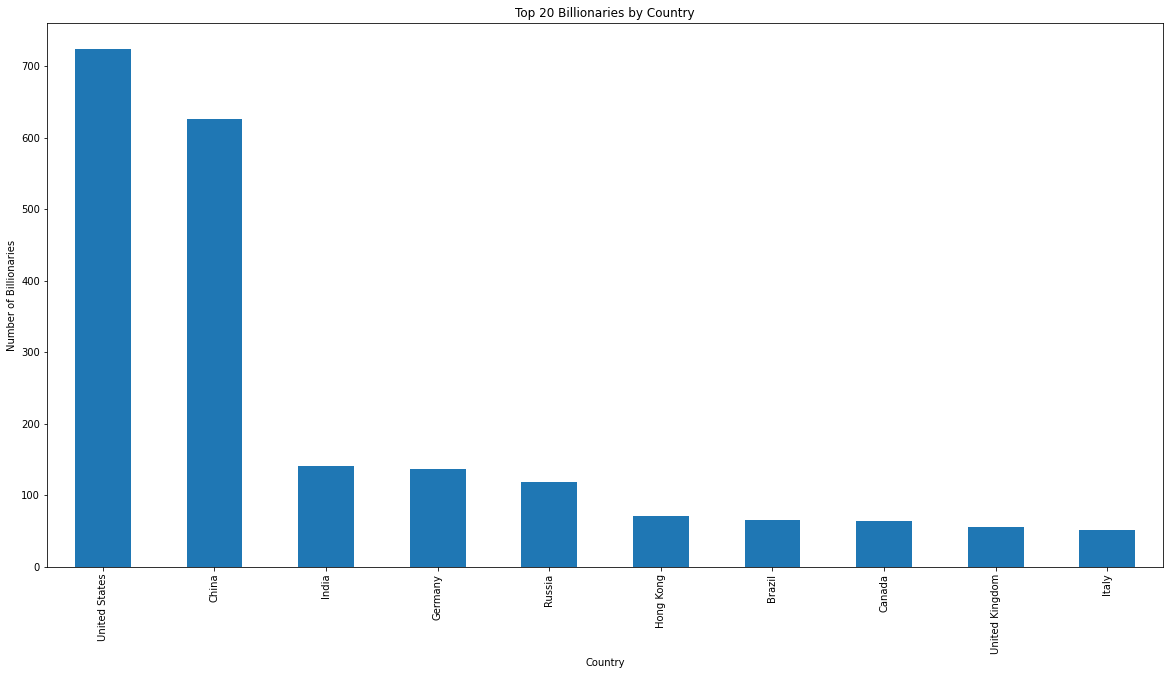

In [20]:
plt.figure(figsize=(20,10))
country_data = data['Country'].value_counts().head(10)
country_data.plot.bar()
plt.title('Top 20 Billionaries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Billionaries')
plt.show()

Difference between Seftmade and not

Text(0.5, 1.0, 'Self-made vs Not Self-made')

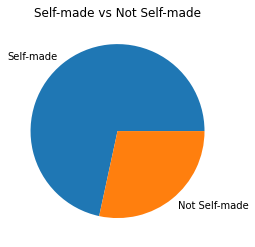

In [25]:
sef_made = len(data[data['Self_made']==True])
not_sef_made = len(data[data['Self_made']==False])
plt.figure()
sef_made_pie = [sef_made, not_sef_made]
labels = ['Self-made', 'Not Self-made']	
plt.pie(sef_made_pie, labels=labels)
plt.title('Self-made vs Not Self-made')

Checking the marriage status

In [26]:
data['Status'].unique()

array(['In Relationship', 'Married', 'Divorced', 'Widowed, Remarried',
       nan, 'Widowed', 'Single', 'Separated', 'Engaged'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

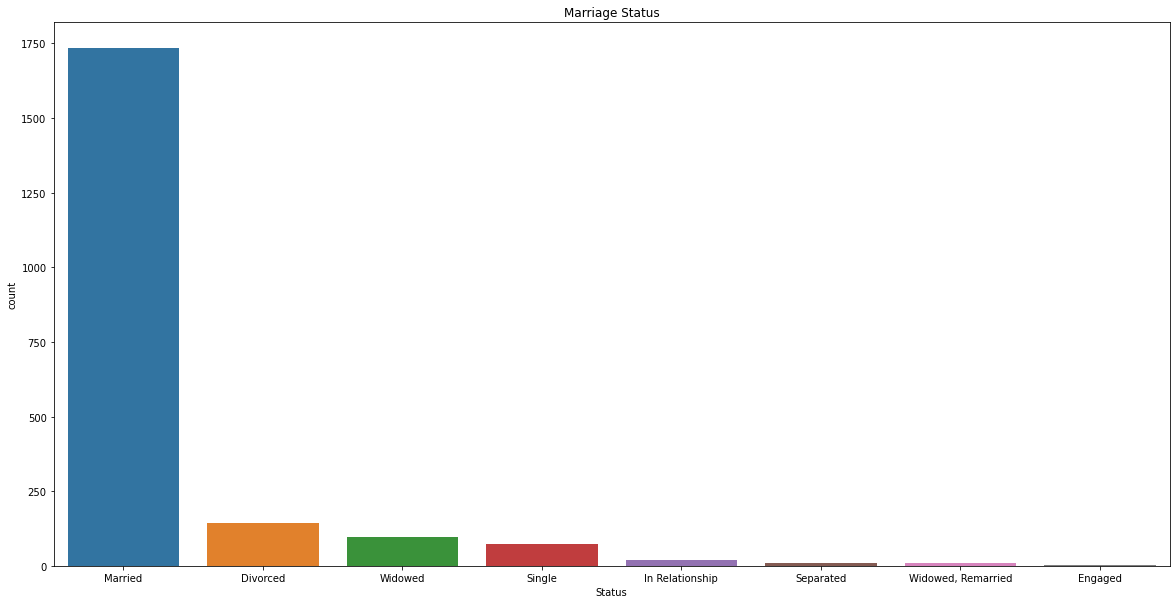

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Status'], order=data['Status'].value_counts().index)
plt.title('Marriage Status')
plt.show

In [32]:
def age(age):
    if age >= 90 : return '90 years old'
    if age >= 80 : return '80 years old'
    if age >= 70 : return '70 years old'
    if age >= 60 : return '60 years old'
    if age >= 50 : return '50 years old'
    if age >= 40 : return '40 years old'
    if age >= 30 : return '30 years old'
    if age >= 20 : return '20 years old'
    else: return 'Less than 20 years old'
data['group']= data['Age'].apply(age)

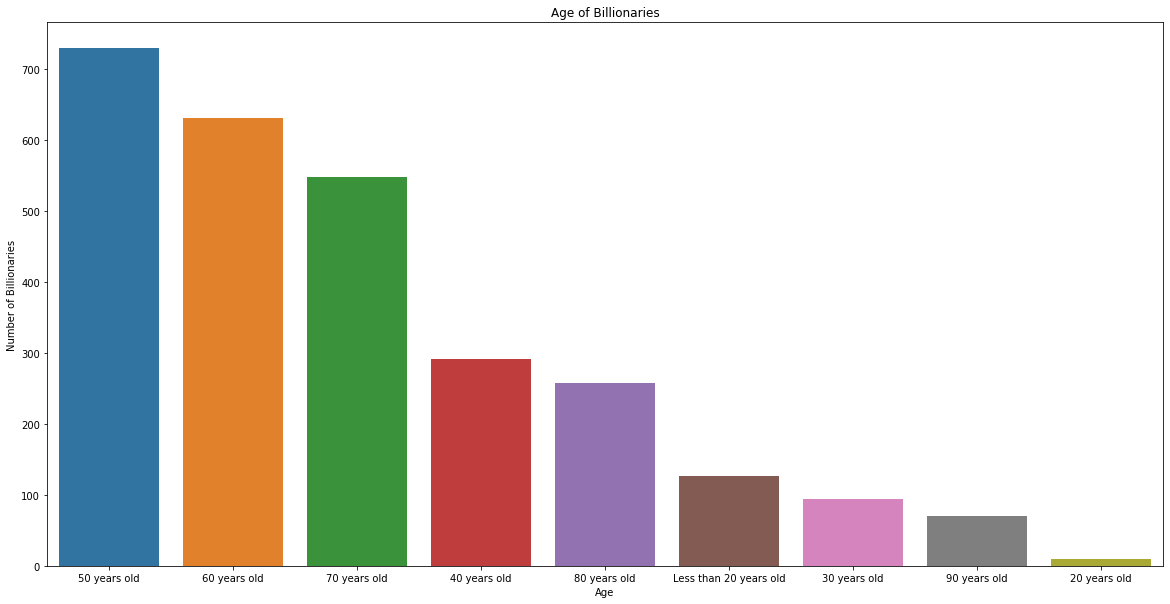

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['group'], order=data['group'].value_counts().index)
plt.title ('Age of Billionaries')
plt.xlabel('Age')
plt.ylabel('Number of Billionaries')
plt.show()